In [33]:
import requests
from bs4 import BeautifulSoup
import urllib.request

In [34]:
def get_article(URL):
    source_code_from_URL = urllib.request.urlopen(URL)
    soup = BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='utf-8')
    news_title = soup.title.text
    publisher = soup.find('meta', attrs={'name':'twitter:creator'}).get('content')
    news_content = soup.find('div', attrs = {'id':'articleBodyContents'}).text
    news_content = news_content.split('{}')[1].strip()
    return news_title, publisher, news_content

In [3]:
def get_articleold(url):
    # Obtain three types of information about a news article
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    news_title = soup.title.text
    publisher = soup.find('meta', attrs={'name':'twitter:creator'}).get('content')
    news_content = soup.find('div', attrs = {'id':'articleBodyContents'}).text
    news_content = news_content.split('{}')[1].strip()
    return news_title, publisher, news_content

In [35]:
url = 'https://news.naver.com/main/read.nhn?oid=421&sid1=100&aid=0003646082&mid=shm&mode=LSD&nh=20181018225255'
title, publisher, content = get_article(url)

In [36]:
content

'아셈 계기 영국·독일·태국 정상회담…대북제재 완화 설득 가속화문재인 대통령이 18일 오후(현지시간) 바티칸 교황청을 방문해 프란치스코 교황과 악수하고 있다. (청와대 페이스북) 2018.10.18/뉴스1(바티칸=뉴스1) 조소영 기자 = 프란치스코 교황이 18일(현지시간) 문재인 대통령과의 만남에서 사실상 방북(訪北)의사를 밝힘에 따라 문 대통령의 \'한반도 평화프로세스\' 추진에 상당한 힘이 실리게 됐다. 문 대통령은 교황의 지지를 기반으로 제2차 북미정상회담의 신속한 개최를 촉구하고 국제사회에 북한의 비핵화를 촉진하기 위해선 대북제재 완화가 일정 정도 필요하다는 주장을 이어갈 것으로 보인다.문 대통령은 이날 오후 12시5분 바티칸 교황궁 내 교황서재에서 40분 동안 프란치스코 교황을 단독 예방했다. 교황과의 만남은 원활한 의사소통을 위한 통역 외에 배석자 없이 \'비밀\'로 이뤄진다는 원칙에 따라 이날 예방도 통역을 위해 자리한 한현택 신부 외 누구도 배석하지 않은 것으로 전해졌다.다만 사전에 청와대와 바티칸 사이 협의를 거쳐 이례적으로 면담의 주요내용이 공개됐다. 이에 따라 윤영찬 청와대 국민소통수석이 밝힌 데 따르면 교황은 문 대통령이 김정은 북한 국무위원장의 방북 초청 의사를 전하면서 "김 위원장이 초청장을 보내도 좋겠느냐"고 하자 "공식 초청장을 보내주면 좋겠다"고 했다.교황은 이어 "초청장이 오면 무조건 응답을 줄 것이고 나는 갈 수 있다"고 했다. \'북한을 갈 수 있다\'고 완벽히 언급하지는 않았지만 문맥상 이는 북한 땅을 밟겠다는 뜻으로 해석됐다. 교황은 그러면서 "한반도에서 평화프로세스를 추진 중인 한국정부의 노력을 강력히 지지한다"며 "멈추지 말고 앞으로 나아가라. 두려워하지 말라"고 하면서 이 해석에 힘을 보탰다.윤 수석은 \'교황이 방북시점에 대한 언급은 없었느냐\'는 데에 "시점에 대해선 말이 없었다"고 전했다. 이에 따라 한편에선 교황의 답이 원론적 의미가 아니냐는 풀이도 나오지만 교황이 방북 자체에 문을 열어뒀다는 데에 의의가 있

In [37]:
stopwords = ['재테크','배포','금지', '기자', 'co','kr','나가기','페이스북','com', '.kr', '뉴스1']

In [38]:
from kornounextractor.noun_extractor import extract

In [39]:
with open('dic.txt', 'w', encoding='utf8') as f:
    for word in sorted(extract(content, freq=2.0)):
        f.write(word+'\tNNG\n')

In [40]:
import konlpy.tag
komoran = konlpy.tag.Komoran(userdic='dic.txt')

In [41]:
Nouns = komoran.nouns(content)
final_nouns = Nouns.copy()
unique_nouns = set(Nouns)
for word in unique_nouns:
    if len(word) == 1:
        while word in final_nouns:
            final_nouns.remove(word)
    if word in stopwords:
        while word in final_nouns:
            final_nouns.remove(word)

In [42]:
print(final_nouns)

['아셈', '계기', '영국', '독일', '태국', '정상회담', '대북제재', '완화', '설득', '가속', '문재인', '대통령', '오후', '현지시간', '바티칸', '교황청', '방문', '프란치스코', '교황', '악수', '청와대', '바티칸', '소영', '프란치스코', '교황', '현지시간', '문재인', '대통령', '만남', '사실', '방북', '의사', '대통령', '한반도', '평화프로세스', '추진', '상당', '대통령', '교황', '지지', '기반', '북미', '정상회담', '신속', '개최', '촉구', '국제사회', '북한', '비핵화', '촉진', '대북제재', '완화', '일정', '정도', '필요', '주장', '대통령', '이날', '오후', '바티칸', '교황', '교황', '서재', '동안', '프란치스코', '교황', '단독', '예방', '교황', '만남', '원활', '의사소통', '통역', '배석', '비밀', '원칙', '이날', '예방', '통역', '자리', '한현택', '신부', '배석', '다만', '사전', '청와대', '바티칸', '사이', '협의', '이례', '면담', '내용', '공개', '윤영', '청와대', '국민', '소통', '수석', '교황', '대통령', '김정은', '북한', '국무위원', '장의', '방북', '초청', '의사', '위원장', '초청장', '공식', '초청장', '교황', '초청장', '응답', '있다', '북한', '있다', '언급', '문맥', '북한', '해석', '교황', '한반도', '평화프로세스', '추진', '한국', '정부', '노력', '지지', '말라', '해석', '수석', '교황', '방북', '시점', '언급', '시점', '한편', '교황', '원론', '의미', '풀이', '교황', '방북', '자체', '의의', '대통령', '추진', '유럽', '한반도', '평화프로세스', '설득', '작업', '모양새', '감지', '대

In [43]:
from kr_sna import do_kr_sna

In [44]:
content

'아셈 계기 영국·독일·태국 정상회담…대북제재 완화 설득 가속화문재인 대통령이 18일 오후(현지시간) 바티칸 교황청을 방문해 프란치스코 교황과 악수하고 있다. (청와대 페이스북) 2018.10.18/뉴스1(바티칸=뉴스1) 조소영 기자 = 프란치스코 교황이 18일(현지시간) 문재인 대통령과의 만남에서 사실상 방북(訪北)의사를 밝힘에 따라 문 대통령의 \'한반도 평화프로세스\' 추진에 상당한 힘이 실리게 됐다. 문 대통령은 교황의 지지를 기반으로 제2차 북미정상회담의 신속한 개최를 촉구하고 국제사회에 북한의 비핵화를 촉진하기 위해선 대북제재 완화가 일정 정도 필요하다는 주장을 이어갈 것으로 보인다.문 대통령은 이날 오후 12시5분 바티칸 교황궁 내 교황서재에서 40분 동안 프란치스코 교황을 단독 예방했다. 교황과의 만남은 원활한 의사소통을 위한 통역 외에 배석자 없이 \'비밀\'로 이뤄진다는 원칙에 따라 이날 예방도 통역을 위해 자리한 한현택 신부 외 누구도 배석하지 않은 것으로 전해졌다.다만 사전에 청와대와 바티칸 사이 협의를 거쳐 이례적으로 면담의 주요내용이 공개됐다. 이에 따라 윤영찬 청와대 국민소통수석이 밝힌 데 따르면 교황은 문 대통령이 김정은 북한 국무위원장의 방북 초청 의사를 전하면서 "김 위원장이 초청장을 보내도 좋겠느냐"고 하자 "공식 초청장을 보내주면 좋겠다"고 했다.교황은 이어 "초청장이 오면 무조건 응답을 줄 것이고 나는 갈 수 있다"고 했다. \'북한을 갈 수 있다\'고 완벽히 언급하지는 않았지만 문맥상 이는 북한 땅을 밟겠다는 뜻으로 해석됐다. 교황은 그러면서 "한반도에서 평화프로세스를 추진 중인 한국정부의 노력을 강력히 지지한다"며 "멈추지 말고 앞으로 나아가라. 두려워하지 말라"고 하면서 이 해석에 힘을 보탰다.윤 수석은 \'교황이 방북시점에 대한 언급은 없었느냐\'는 데에 "시점에 대해선 말이 없었다"고 전했다. 이에 따라 한편에선 교황의 답이 원론적 의미가 아니냐는 풀이도 나오지만 교황이 방북 자체에 문을 열어뒀다는 데에 의의가 있

In [45]:
g = do_kr_sna(content, final_nouns, stopwords)

In [46]:
g.nodes()

NodeView(('교황', '대통령', '한반도', '바티칸', '방북', '평화프로세스', '북한', '영국', '독일', '대북제재', '완화', '정상회담', '설득', '프란치스코', '청와대', '의사', '추진', '초청장', '프랑스', '안보리'))

In [47]:
import networkx as nx

In [49]:
g['교황']

AtlasView({'정상회담': {'weight': 2}, '완화': {'weight': 2}, '바티칸': {'weight': 4}, '설득': {'weight': 1}, '영국': {'weight': 1}, '대통령': {'weight': 6}, '프란치스코': {'weight': 3}, '대북제재': {'weight': 2}, '독일': {'weight': 1}, '추진': {'weight': 2}, '평화프로세스': {'weight': 3}, '방북': {'weight': 5}, '한반도': {'weight': 3}, '의사': {'weight': 2}, '북한': {'weight': 3}, '초청장': {'weight': 2}, '청와대': {'weight': 1}})

In [50]:
x = nx.degree_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('대통령', 1.0),
 ('교황', 0.894736842105263),
 ('바티칸', 0.7894736842105263),
 ('대북제재', 0.7894736842105263),
 ('완화', 0.7894736842105263),
 ('의사', 0.7894736842105263),
 ('프란치스코', 0.7368421052631579),
 ('한반도', 0.6842105263157894),
 ('평화프로세스', 0.6842105263157894),
 ('영국', 0.6842105263157894),
 ('독일', 0.631578947368421),
 ('설득', 0.631578947368421),
 ('방북', 0.5789473684210527),
 ('정상회담', 0.5263157894736842),
 ('북한', 0.47368421052631576),
 ('추진', 0.47368421052631576),
 ('청와대', 0.3684210526315789),
 ('안보리', 0.3684210526315789),
 ('초청장', 0.3157894736842105),
 ('프랑스', 0.3157894736842105)]

In [51]:
x = nx.closeness_centrality(g, distance='weight')
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('의사', 0.7307692307692307),
 ('바티칸', 0.6785714285714286),
 ('프란치스코', 0.6785714285714286),
 ('대북제재', 0.6333333333333333),
 ('완화', 0.6333333333333333),
 ('청와대', 0.6129032258064516),
 ('한반도', 0.59375),
 ('평화프로세스', 0.59375),
 ('방북', 0.5757575757575758),
 ('영국', 0.5757575757575758),
 ('추진', 0.5757575757575758),
 ('교황', 0.5588235294117647),
 ('북한', 0.5588235294117647),
 ('독일', 0.5428571428571428),
 ('안보리', 0.5428571428571428),
 ('설득', 0.5277777777777778),
 ('초청장', 0.5277777777777778),
 ('정상회담', 0.5135135135135135),
 ('프랑스', 0.5135135135135135),
 ('대통령', 0.5)]

In [52]:
x = nx.betweenness_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('대통령', 0.1006845818249327),
 ('의사', 0.061897800055694785),
 ('교황', 0.057214796249883966),
 ('대북제재', 0.031121785946347343),
 ('완화', 0.031121785946347343),
 ('바티칸', 0.02806553420588508),
 ('영국', 0.018453541260558804),
 ('방북', 0.016673628515733778),
 ('프란치스코', 0.013738048825768123),
 ('북한', 0.012141464773043719),
 ('한반도', 0.009263900491970666),
 ('평화프로세스', 0.009263900491970666),
 ('독일', 0.008512020792722548),
 ('설득', 0.005601967882669637),
 ('정상회담', 0.005075187969924812),
 ('안보리', 0.0024041585445094215),
 ('청와대', 0.0019005847953216374),
 ('추진', 0.001485194467650608),
 ('프랑스', 0.0005847953216374269),
 ('초청장', 0.0)]

In [53]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans Korean'


C:\Users\ahn92\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Noto Sans Korean'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


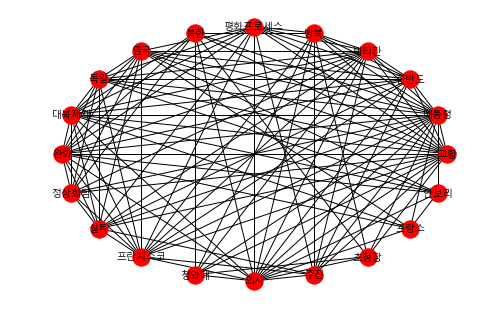

In [54]:
import matplotlib.font_manager as fm
#font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
font_name = 'Malgun Gothic'
pos=nx.shell_layout(g)
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos, font_family=font_name, font_size=10)

plt.show()